In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
%matplotlib inline

import re

df = pd.read_csv('Pokemon.csv')

In [2]:
df = df.fillna('NaN')
df.columns = ['#','Name','Type1', 'Type2','Total' ,'HP', 'Bs.Atk','Bs.Def','Sp.Atk','Sp.Def','Speed', 'Generation', 'Legendary']
df = df.set_index('#')
df.Name = df.Name.apply(lambda x: re.sub(r'(.+)(Mega.+)',r'\2',x))
df.Name = df.Name.apply(lambda x: re.sub(r'(.+)(Primal.+)',r'\2',x))
df.Name = df.Name.apply(lambda x: re.sub(r'(HoopaHoopa)(.+)','Hoopa'+r'\2',x))


df.head()

Name  Type1   Type2  Total  HP  Bs.Atk  Bs.Def  Sp.Atk  Sp.Def  \
#                                                                            
1      Bulbasaur  Grass  Poison    318  45      49      49      65      65   
2        Ivysaur  Grass  Poison    405  60      62      63      80      80   
3       Venusaur  Grass  Poison    525  80      82      83     100     100   
3  Mega Venusaur  Grass  Poison    625  80     100     123     122     120   
4     Charmander   Fire     NaN    309  39      52      43      60      50   

   Speed  Generation  Legendary  
#                                
1     45           1      False  
2     60           1      False  
3     80           1      False  
3     80           1      False  
4     65           1      False

In [3]:
df['Primal'] = df['Name'].str.contains('Primal ') == True
df['Mega'] = df['Name'].str.contains('Mega ') == True


df.head()

Name  Type1   Type2  Total  HP  Bs.Atk  Bs.Def  Sp.Atk  Sp.Def  \
#                                                                            
1      Bulbasaur  Grass  Poison    318  45      49      49      65      65   
2        Ivysaur  Grass  Poison    405  60      62      63      80      80   
3       Venusaur  Grass  Poison    525  80      82      83     100     100   
3  Mega Venusaur  Grass  Poison    625  80     100     123     122     120   
4     Charmander   Fire     NaN    309  39      52      43      60      50   

   Speed  Generation  Legendary  Primal   Mega  
#                                               
1     45           1      False   False  False  
2     60           1      False   False  False  
3     80           1      False   False  False  
3     80           1      False   False   True  
4     65           1      False   False  False

In [4]:
num_legendary = df.loc[(df['Legendary']==True)].shape[0]
print("Legendary pokemons %f  %d %d" % (num_legendary*100.0/df.shape[0], num_legendary, df.shape[0]))

Legendary pokemons 8.125000  65 800


In [5]:

df['Attack'] = df['Bs.Atk'] + df['Sp.Atk']
df['Defense'] = df['Bs.Def'] + df['Sp.Def']

df.head()

Name  Type1   Type2  Total  HP  Bs.Atk  Bs.Def  Sp.Atk  Sp.Def  \
#                                                                            
1      Bulbasaur  Grass  Poison    318  45      49      49      65      65   
2        Ivysaur  Grass  Poison    405  60      62      63      80      80   
3       Venusaur  Grass  Poison    525  80      82      83     100     100   
3  Mega Venusaur  Grass  Poison    625  80     100     123     122     120   
4     Charmander   Fire     NaN    309  39      52      43      60      50   

   Speed  Generation  Legendary  Primal   Mega  Attack  Defense  
#                                                                
1     45           1      False   False  False     114      114  
2     60           1      False   False  False     142      143  
3     80           1      False   False  False     182      183  
3     80           1      False   False   True     222      243  
4     65           1      False   False  False     112       93

In [6]:
def thresholdize(base, t, x):
    if x < base + t:
        return "low"
    elif x < base + 2*t:
        return "medium"
    else:
        return "high"

def make_scale(col):
    xslice = df[col]
    xmin = xslice.min()
    xmax = xslice.max()
    threshold = (xmax - xmin) / 3
    df[col+"_level"] = [thresholdize(xmin, threshold, x) for x in df[col]]


columns = ['Attack','Defense','Speed']
for col in columns:
    make_scale(col)


df.head()

Name  Type1   Type2  Total  HP  Bs.Atk  Bs.Def  Sp.Atk  Sp.Def  \
#                                                                            
1      Bulbasaur  Grass  Poison    318  45      49      49      65      65   
2        Ivysaur  Grass  Poison    405  60      62      63      80      80   
3       Venusaur  Grass  Poison    525  80      82      83     100     100   
3  Mega Venusaur  Grass  Poison    625  80     100     123     122     120   
4     Charmander   Fire     NaN    309  39      52      43      60      50   

   Speed  Generation  Legendary  Primal   Mega  Attack  Defense Attack_level  \
#                                                                              
1     45           1      False   False  False     114      114          low   
2     60           1      False   False  False     142      143       medium   
3     80           1      False   False  False     182      183       medium   
3     80           1      False   False   True     222      243       medium   
4     65           1      False   False  False     112       93          low   

  Defense_level Speed_level  
#                            
1           low         low  
2           low         low  
3        medium      medium  
3        medium      medium  
4           low      medium

In [7]:
df.describe()

Total          HP      Bs.Atk      Bs.Def      Sp.Atk      Sp.Def  \
count  800.00000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   435.10250   69.258750   79.001250   73.842500   72.820000   71.902500   
std    119.96304   25.534669   32.457366   31.183501   32.722294   27.828916   
min    180.00000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    330.00000   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    450.00000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    515.00000   80.000000  100.000000   90.000000   95.000000   90.000000   
max    780.00000  255.000000  190.000000  230.000000  194.000000  230.000000   

            Speed  Generation      Attack     Defense  
count  800.000000   800.00000  800.000000  800.000000  
mean    68.277500     3.32375  151.821250  145.745000  
std     29.060474     1.66129   54.462505   51.315827  
min      5.000000     1.00000   20.000000   35.000000  
25%     45.000000     2.00000  111.750000  109.750000  
50%     65.000000     3.00000  146.500000  140.000000  
75%     90.000000     5.00000  182.000000  180.000000  
max    180.000000     6.00000  360.000000  460.000000

[166, 106, 160, 121, 165]


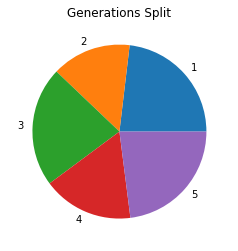

In [8]:
gen = []
for i in range(1,6):
    gen.append(df.loc[df['Generation'] == i].shape[0])
print(gen)

ppie = plt.pie(gen,labels= ['1','2','3','4','5'])
plt.title('Generations Split')
fig = plt.gcf()

In [9]:
def get_stats(Poke, column, fun):
    statement = ''
    for col in column:
        stat = fun(Poke[col])
        name = Poke[Poke[col]==fun(Poke[col])]['Name'].values[0]
        gen =  Poke[Poke[col]==fun(Poke[col])]['Generation'].values[0]
        statement += name+' of Generation '+str(gen)+' has the best '+col+' stat of '+str(stat)+'.\n'
    return statement

stats = ['Total','HP', 'Bs.Atk','Bs.Def','Sp.Atk','Sp.Def','Speed']

print(get_stats(df,stats, lambda x: x.max()))
print(get_stats(df,stats, lambda x: x.min()))


for i in range(1,6):
    d = df.loc[df['Generation'] == i]
    print(get_stats(d, ['Total'], lambda x: x.max()))

Mega Mewtwo X of Generation 1 has the best Total stat of 780.
Blissey of Generation 2 has the best HP stat of 255.
Mega Mewtwo X of Generation 1 has the best Bs.Atk stat of 190.
Mega Steelix of Generation 2 has the best Bs.Def stat of 230.
Mega Mewtwo Y of Generation 1 has the best Sp.Atk stat of 194.
Shuckle of Generation 2 has the best Sp.Def stat of 230.
DeoxysSpeed Forme of Generation 3 has the best Speed stat of 180.

Sunkern of Generation 2 has the best Total stat of 180.
Shedinja of Generation 3 has the best HP stat of 1.
Chansey of Generation 1 has the best Bs.Atk stat of 5.
Chansey of Generation 1 has the best Bs.Def stat of 5.
Shuckle of Generation 2 has the best Sp.Atk stat of 10.
Caterpie of Generation 1 has the best Sp.Def stat of 20.
Shuckle of Generation 2 has the best Speed stat of 5.

Mega Mewtwo X of Generation 1 has the best Total stat of 780.

Mega Tyranitar of Generation 2 has the best Total stat of 700.

Mega Rayquaza of Generation 3 has the best Total stat of 780

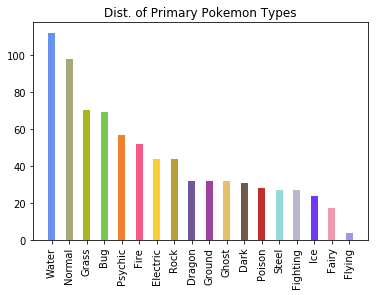

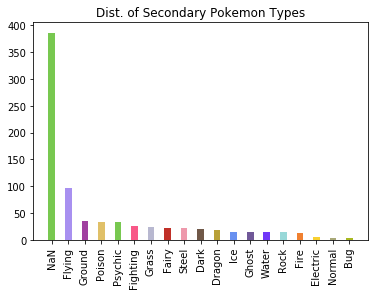

In [10]:
type1_colours= ['#6890F0',  # Water
                    '#A8A878',  # Normal
                    '#A8B820',  # Bug
                    '#78C850',  # Grass
                    '#F08030',  # Fire
                    '#F85888',  # Psychic
                    '#F8D030',  # Electric
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#A040A0',  # Poison
                    '#E0C068',  # Ground
                    '#705848',  # Dark
                    '#C03028',  # Fighting
                    '#98D8D8',  # Ice
                    '#B8B8D0',  # Steel
                    '#7038F8',  # Dragon
                    '#EE99AC',  # Fairy
                    '#A890F0',  # Flying
                   ]

type2_colours= ['#78C850',  #None
                '#A890F0',  # Flying
                '#A040A0',  # Poison
                '#E0C068',  # Ground
                '#78C850',  # Grass
                '#F85888',  # Psychic
                '#B8B8D0',  # Steel
                '#C03028',  # Fighting
                '#EE99AC',  # Fairy
                '#705848',  # Dark
                '#B8A038',  # Rock
                '#6890F0',  # Water
                '#705898',  # Ghost
                '#7038F8',  # Dragon
                '#98D8D8',  # Ice
                '#F08030',  # Fire
                '#F8D030',  # Electric
                '#A8A878',  # Normal
                '#A8B820',  # Bug  
                ]


ptypes = pd.value_counts(df['Type1'])
h = [k*2 for k in range(0,ptypes.shape[0])]
plt.bar(h, ptypes.values, color=type1_colours)
plt.xticks(h, ptypes.index, rotation=90)
plt.title('Dist. of Primary Pokemon Types')
plt.show()

ptypes = pd.value_counts(df['Type2'])
h = [k*2 for k in range(0,ptypes.shape[0])]
plt.bar(h, ptypes.values, color=type2_colours)
plt.xticks(h, ptypes.index, rotation=90)
plt.title('Dist. of Secondary Pokemon Types')
plt.show()


[Text(0.5, 1.0, 'HeatMap to show Correlation between Base Stats')]

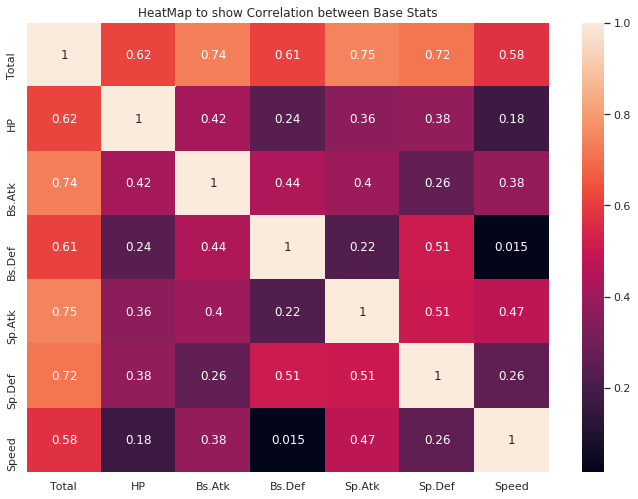

In [11]:
import seaborn as sb

Corr = df[['Total' ,'HP', 'Bs.Atk','Bs.Def','Sp.Atk','Sp.Def','Speed']]
sb.set()
dims = (11.7,8.27) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
CorrelationMap = sb.heatmap(Corr.corr(),annot = True, ax = ax)
CorrelationMap.set(title = 'HeatMap to show Correlation between Base Stats')

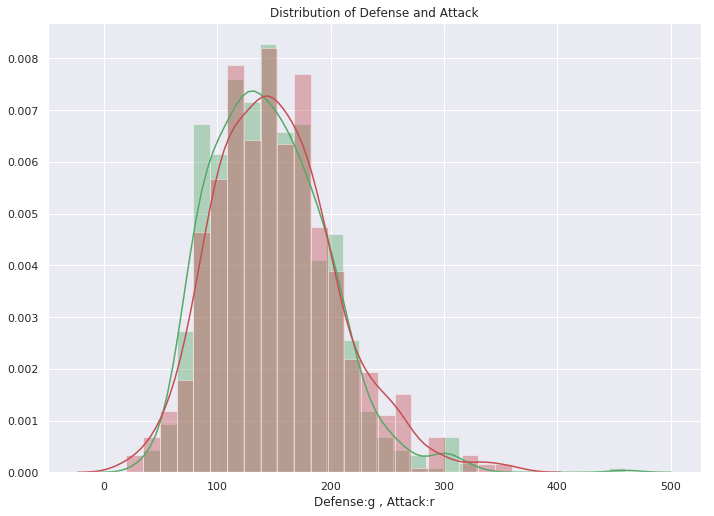

In [12]:
dims = (11.7,8.27) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
Defhist = sb.distplot(df['Defense'],color='g',hist=True,ax=ax)
Atthist = sb.distplot(df['Attack'],color = 'r', hist = True,ax=ax)
Atthist.set(title = 'Distribution of Defense and Attack', xlabel = 'Defense:g , Attack:r')
FigHist=Atthist.get_figure()
FigHist.savefig("HistDvAtt.png")

# Here, the distribution of both attributes are also similar. Also a positive skew is seen. We can see that there is a significant tail end to the Defense stat as opposed to the Attack stat, portraying that the Defense stat has more Pokemon with high Defense stats than Attack. You could argue that the Defense stat has a higher variance than the Attack stat.

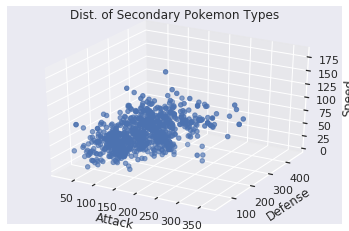

In [13]:
from mpl_toolkits.mplot3d import Axes3D 
data = [df.Attack.values, df.Defense.values, df.Speed.values]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[0], data[1], data[2])
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('Speed')
plt.title('Dist. of Secondary Pokemon Types')
plt.show()

In [14]:
named_pokes = df[['Name']]
pokes = df[['HP', 'Attack', 'Defense', 'Speed']]
pokes = pokes.values

scores = []
for n_clusters in range(2,21):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(pokes)
    centers = clusterer.cluster_centers_
#     print(centers)
#     print(preds)

    score = silhouette_score (pokes, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    scores.append(score)

    
# # named_pokes
# named_pokes.values
# # pd.Series(clusters)
# # r = pd.concat([pd.Series(named_pokes.values), pd.Series(clusters)], ignore_index=True)
# # r

For n_clusters = 2, silhouette score is 0.37997968333273474)
For n_clusters = 3, silhouette score is 0.31641208456137876)
For n_clusters = 4, silhouette score is 0.3063324610858364)
For n_clusters = 5, silhouette score is 0.2906627276416962)
For n_clusters = 6, silhouette score is 0.23592544083773195)
For n_clusters = 7, silhouette score is 0.2325974562300599)
For n_clusters = 8, silhouette score is 0.23238144981997025)
For n_clusters = 9, silhouette score is 0.2367001089053781)
For n_clusters = 10, silhouette score is 0.23655643426649306)
For n_clusters = 11, silhouette score is 0.2311883279637783)
For n_clusters = 12, silhouette score is 0.22361365960951268)
For n_clusters = 13, silhouette score is 0.22112834200882628)
For n_clusters = 14, silhouette score is 0.22078978197131727)
For n_clusters = 15, silhouette score is 0.22466512550525586)
For n_clusters = 16, silhouette score is 0.2133503039143297)
For n_clusters = 17, silhouette score is 0.2141973988415318)
For n_clusters = 18, si

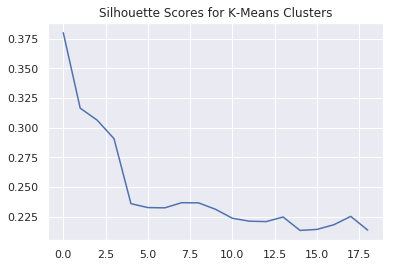

In [15]:

scores

plt.plot([x for x in range(0, len(scores))], scores)
plt.title('Silhouette Scores for K-Means Clusters')
plt.show()


In [16]:
# df.to_excel("pokemon_dataset.xlsl")
df.to_csv("pokemon_dataset.csv")
df.head()

Name  Type1   Type2  Total  HP  Bs.Atk  Bs.Def  Sp.Atk  Sp.Def  \
#                                                                            
1      Bulbasaur  Grass  Poison    318  45      49      49      65      65   
2        Ivysaur  Grass  Poison    405  60      62      63      80      80   
3       Venusaur  Grass  Poison    525  80      82      83     100     100   
3  Mega Venusaur  Grass  Poison    625  80     100     123     122     120   
4     Charmander   Fire     NaN    309  39      52      43      60      50   

   Speed  Generation  Legendary  Primal   Mega  Attack  Defense Attack_level  \
#                                                                              
1     45           1      False   False  False     114      114          low   
2     60           1      False   False  False     142      143       medium   
3     80           1      False   False  False     182      183       medium   
3     80           1      False   False   True     222      243       medium   
4     65           1      False   False  False     112       93          low   

  Defense_level Speed_level  
#                            
1           low         low  
2           low         low  
3        medium      medium  
3        medium      medium  
4           low      medium

In [17]:
df2 = df [['Name', 'Legendary', 'Attack_level', 'Defense_level', 'Speed_level']]
df2.to_csv("pokemon_mini.csv")
df2.head()


Name  Legendary Attack_level Defense_level Speed_level
#                                                                 
1      Bulbasaur      False          low           low         low
2        Ivysaur      False       medium           low         low
3       Venusaur      False       medium        medium      medium
3  Mega Venusaur      False       medium        medium      medium
4     Charmander      False          low           low      medium

In [18]:

def make_nominal_scale(col):
    xslice = df[col]
    df[col+"_weak"] = [True if x == 'low' else False for x in df[col+"_level"]]
    df[col+"_normal"] = [True if x == 'medium' else False for x in df[col+"_level"]]
    df[col+"_strong"] = [True if x == 'high' else False for x in df[col+"_level"]]


columns = ['Attack','Defense','Speed']
for col in columns:
    make_nominal_scale(col)


df.head()


Name  Type1   Type2  Total  HP  Bs.Atk  Bs.Def  Sp.Atk  Sp.Def  \
#                                                                            
1      Bulbasaur  Grass  Poison    318  45      49      49      65      65   
2        Ivysaur  Grass  Poison    405  60      62      63      80      80   
3       Venusaur  Grass  Poison    525  80      82      83     100     100   
3  Mega Venusaur  Grass  Poison    625  80     100     123     122     120   
4     Charmander   Fire     NaN    309  39      52      43      60      50   

   Speed  ...  Speed_level  Attack_weak  Attack_normal  Attack_strong  \
#         ...                                                           
1     45  ...          low         True          False          False   
2     60  ...          low        False           True          False   
3     80  ...       medium        False           True          False   
3     80  ...       medium        False           True          False   
4     65  ...       medium         True          False          False   

   Defense_weak  Defense_normal Defense_strong Speed_weak Speed_normal  \
#                                                                        
1          True           False          False       True        False   
2          True           False          False       True        False   
3         False            True          False      False         True   
3         False            True          False      False         True   
4          True           False          False      False         True   

   Speed_strong  
#                
1         False  
2         False  
3         False  
3         False  
4         False  

[5 rows x 28 columns]

In [20]:


s = ""
for index, x in df[['Name', 'Generation', 'Legendary']].iterrows():
    a,b,c = x
    b = "Gen" + str(b)
    c = "Legendary" if c == True else "Basic"
    s += a + ',' + b + ',' + c + '\n'
    
print(s[:100])
f = open("pokemon_triadic.csv", "w")
f.write(s)
f.close()

Bulbasaur,Gen1,Basic
Ivysaur,Gen1,Basic
Venusaur,Gen1,Basic
Mega Venusaur,Gen1,Basic
Charmander,Gen1


In [52]:
df3 = df [['Name', 'Attack_weak', 'Attack_normal', 'Attack_strong', 'Defense_weak', 'Defense_normal', 'Defense_strong', 'Speed_weak', 'Speed_normal', 'Speed_strong']]
df3.to_csv("pokemon_diadic.csv")
df3.head()

def clean(word):
    return ''.join(letter for letter in word.lower() if 'a' <= letter <= 'z')

atr = df3.columns.values

s = "" 
s += "  ".join([x + " " + str(i+1) for i, x in enumerate(atr[1:])])
s += " \n\n"
for index, x in df3.iterrows():
    x = x.values
    s += "\t".join(["1" if a == True else "0" for a in x[1:]]) + "\t\n"

print(s)
f = open("pokemon_diadic.txt", "w")
f.write(s)
f.close()


Attr 1 Attr 2 Attr 3 Attr 4 Attr 5 Attr 6 Attr 7 Attr 8 Attr 9 

1	0	0	1	0	0	1	0	0	
0	1	0	1	0	0	1	0	0	
0	1	0	0	1	0	0	1	0	
0	1	0	0	1	0	0	1	0	
1	0	0	1	0	0	0	1	0	
0	1	0	1	0	0	0	1	0	
0	1	0	1	0	0	0	1	0	
0	0	1	0	1	0	0	1	0	
0	0	1	0	1	0	0	1	0	
1	0	0	1	0	0	1	0	0	
1	0	0	1	0	0	1	0	0	
0	1	0	0	1	0	0	1	0	
0	1	0	0	1	0	0	1	0	
1	0	0	1	0	0	1	0	0	
1	0	0	1	0	0	1	0	0	
0	1	0	1	0	0	0	1	0	
1	0	0	1	0	0	1	0	0	
1	0	0	1	0	0	1	0	0	
0	1	0	1	0	0	0	1	0	
0	1	0	1	0	0	0	0	1	
1	0	0	1	0	0	1	0	0	
1	0	0	1	0	0	0	1	0	
0	1	0	1	0	0	0	1	0	
0	1	0	1	0	0	0	1	0	
1	0	0	1	0	0	0	1	0	
1	0	0	1	0	0	0	1	0	
1	0	0	1	0	0	0	1	0	
0	1	0	1	0	0	0	1	0	
1	0	0	1	0	0	1	0	0	
0	1	0	1	0	0	0	1	0	
1	0	0	1	0	0	0	1	0	
0	1	0	1	0	0	0	1	0	
1	0	0	1	0	0	1	0	0	
0	1	0	1	0	0	0	1	0	
1	0	0	1	0	0	1	0	0	
1	0	0	1	0	0	1	0	0	
0	1	0	1	0	0	0	1	0	
1	0	0	1	0	0	1	0	0	
1	0	0	1	0	0	0	1	0	
0	1	0	1	0	0	0	1	0	
1	0	0	1	0	0	1	0	0	
0	1	0	1	0	0	1	0	0	
1	0	0	1	0	0	0	1	0	
0	1	0	1	0	0	0	1	0	
1	0	0	1	0	0	1	0	0	
0	1	0	1	0	0	1	0	0	
1	0	0	1	0	0	1	0	0	
0	1	0	1	0	0	0	1	0	
1	0	0	1	0	0	1	0	0	
0	1	